95.0
63
126
96.0
64
127


(<Figure size 640x480 with 1 Axes>,
 (-0.5, 1279.5, 719.5, -0.5))

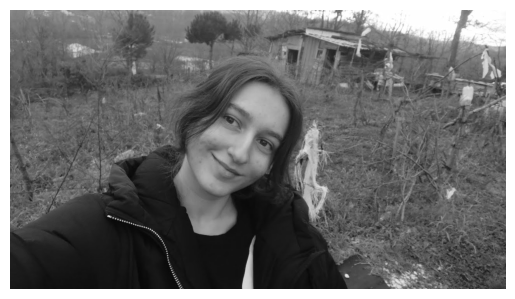

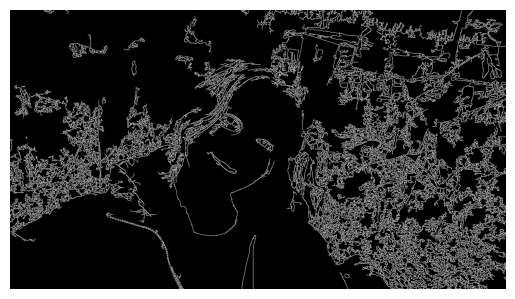

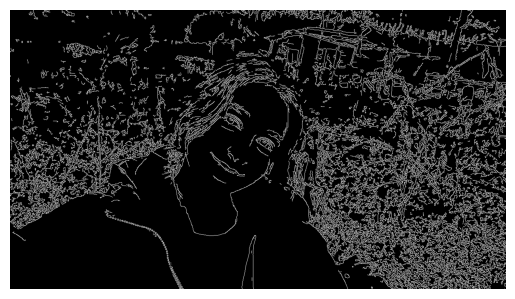

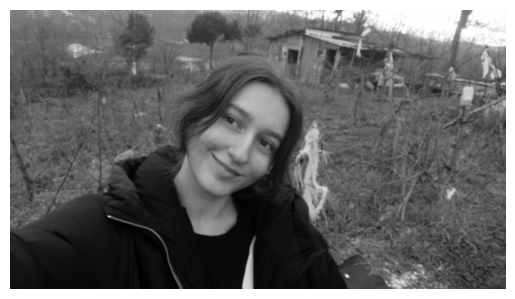

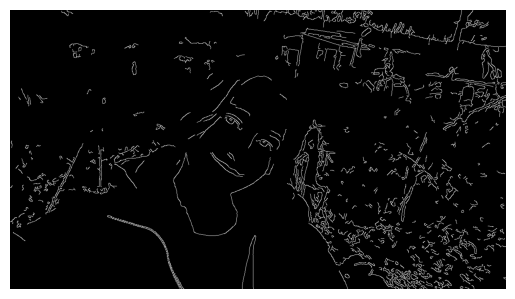

In [ ]:
#kenar algılama
import cv2
import matplotlib.pyplot as plt
import numpy as np

img=cv2.imread("nuray.jpg",0)
plt.figure(),plt.imshow(img,cmap="gray"),plt.axis("off")

edges=cv2.Canny(image=img, threshold1=0,threshold2=255)
plt.figure(),plt.imshow(edges,cmap="gray"),plt.axis("off")

med_val=np.median(img)
print(med_val)

low=int(max(0,(1-0.33)*med_val))
high=int(min(255,(1+0.33)*med_val))

print(low)
print(high)

edges=cv2.Canny(image=img, threshold1=low,threshold2=high)
plt.figure(),plt.imshow(edges,cmap="gray"),plt.axis("off")
#blur

bluredimg=cv2.blur(img,ksize=(4,4))
plt.figure(),plt.imshow(bluredimg,cmap="gray"),plt.axis("off")

med_val=np.median(bluredimg)
print(med_val)

low=int(max(0,(1-0.33)*med_val))
high=int(min(255,(1+0.33)*med_val))

print(low)
print(high)

edges=cv2.Canny(image=bluredimg, threshold1=low,threshold2=high)
plt.figure(),plt.imshow(edges,cmap="gray"),plt.axis("off")









(225, 225)


(-0.5, 224.5, 224.5, -0.5)

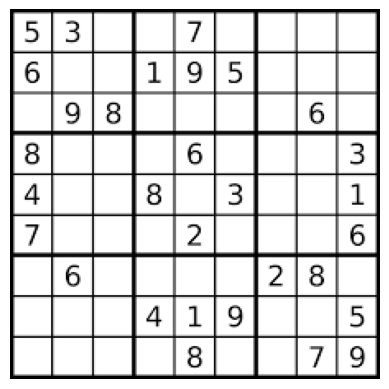

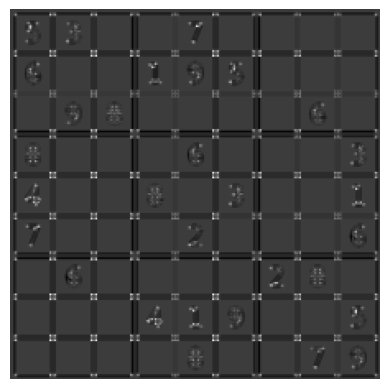

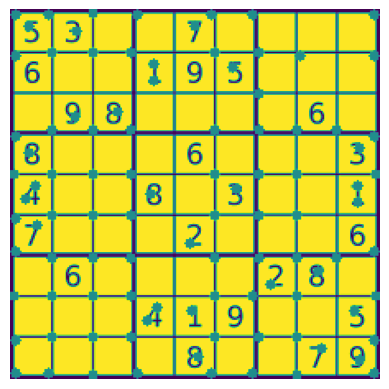

In [ ]:
#kose algılama
import cv2
import matplotlib.pyplot as plt
import numpy as np

img=cv2.imread("sudoku.png",0)
img=np.float32(img)
print(img.shape)
plt.figure(), plt.imshow(img,cmap="gray"), plt.axis("off")

#harris cornor detection
dst=cv2.cornerHarris(img,blockSize=2,ksize=3,k=0.04)
plt.figure(), plt.imshow(dst,cmap="gray"), plt.axis("off")

dst=cv2.dilate(dst,None)
img[dst>0.2*dst.max()]=1
plt.figure(), plt.imshow(dst,cmap="gray"), plt.axis("off")

#shi tomashi detection
img=cv2.imread("sudoku.png",0)
img=np.float32(img)
corners=cv2.goodFeaturesToTrack(img,100,0.01,10)
corners=np.int64(corners)

for i in corners:
  x,y=i.ravel()
  cv2.circle(img,(x,y),3,(125,125,125),cv2.FILLED)

plt.imshow(img)
plt.axis("off")













(<Figure size 640x480 with 1 Axes>,
 (-0.5, 224.5, 224.5, -0.5))

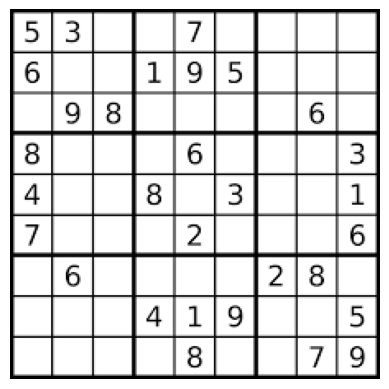

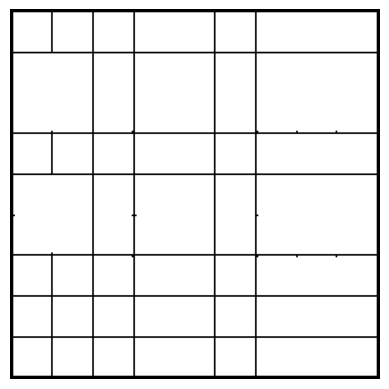

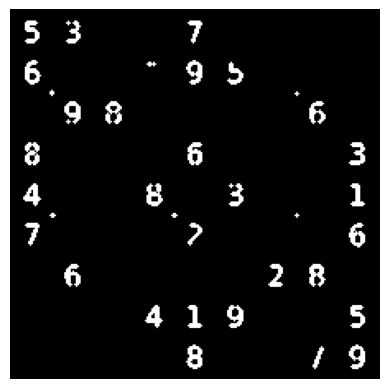

In [ ]:
#kontur algılama
import cv2
import matplotlib.pyplot as plt
import numpy as np

img=cv2.imread("sudoku.png",0)
plt.figure(), plt.imshow(img,cmap="gray"), plt.axis("off")

contours, hierarchy = cv2.findContours(img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

#image, contours, hierarch=cv2.findContours(img,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

external_contour=np.zeros(img.shape)
internal_contour=np.zeros(img.shape)

for i in range(len(contours)):
  if hierarchy[0][i][3]==-1:
    cv2.drawContours(external_contour,contours,i,255,-1)
  else:
    cv2.drawContours(internal_contour,contours,i,255,-1)

plt.figure(), plt.imshow(external_contour,cmap="gray"), plt.axis("off")
plt.figure(), plt.imshow(internal_contour,cmap="gray"), plt.axis("off")



In [ ]:
#kameradaki, görüntüyü alıyor rengi belirliyor
import cv2
import numpy as np
from collections import deque
from google.colab.patches import cv2_imshow

# Nesne merkezini depolayacak veri tipi
buffer_size = 16
pts = deque(maxlen=buffer_size)

# Mavi renk aralığı
blueLower = (84, 98, 0)
blueUpper = (179, 255, 255)

# Capture
cap = cv2.VideoCapture(0)

while True:
    success, imgoriginal = cap.read()

    if success:
        # Blur
        blurred = cv2.GaussianBlur(imgoriginal, (11, 11), 0)

        # HSV
        hsv = cv2.cvtColor(blurred, cv2.COLOR_BGR2HSV)

        # Mavi için maske oluştur
        mask = cv2.inRange(hsv, blueLower, blueUpper)

        # Maskenin etrafındaki gürültüleri sil
        mask = cv2.erode(mask, None, iterations=2)
        mask = cv2.dilate(mask, None, iterations=2)

        # Kontur
        contours, _ = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        center = None
        if len(contours) > 0:
            # En büyük konturu al
            c = max(contours, key=cv2.contourArea)

            # Dikdörtgene çevir
            rect = cv2.minAreaRect(c)
            ((x, y), (width, height), rotation) = rect
            s = "x:{}, y:{}, width:{}, height:{}, rotation:{}".format(np.round(x), np.round(y),
                                                                      np.round(width), np.round(height),
                                                                      np.round(rotation))
            print(s)

            # Kutucuk
            box = cv2.boxPoints(rect)
            box = np.int64(box)

            # Moment
            M = cv2.moments(c)
            if M["m00"] != 0:
                center = (int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"]))

            # Konturu çizdirme
            cv2.drawContours(imgoriginal, [box], 0, (0, 255, 255), 2)

            # Merkeze bir tane nokta çizelim
            if center is not None:
                cv2.circle(imgoriginal, center, 5, (255, 0, 255), -1)

            # Bilgileri ekrana yazdır
            cv2.putText(imgoriginal, s, (50, 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 0, 0), 2)

        pts.appendleft(center)
        for i in range(1, len(pts)):
            if pts[i - 1] is None or pts[i] is None:
                continue
            cv2.line(imgoriginal, pts[i - 1], pts[i], (0, 255, 0), 3)

        cv2_imshow(imgoriginal)

    key = cv2.waitKey(1) & 0xFF
    if key == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()





KeyboardInterrupt: 

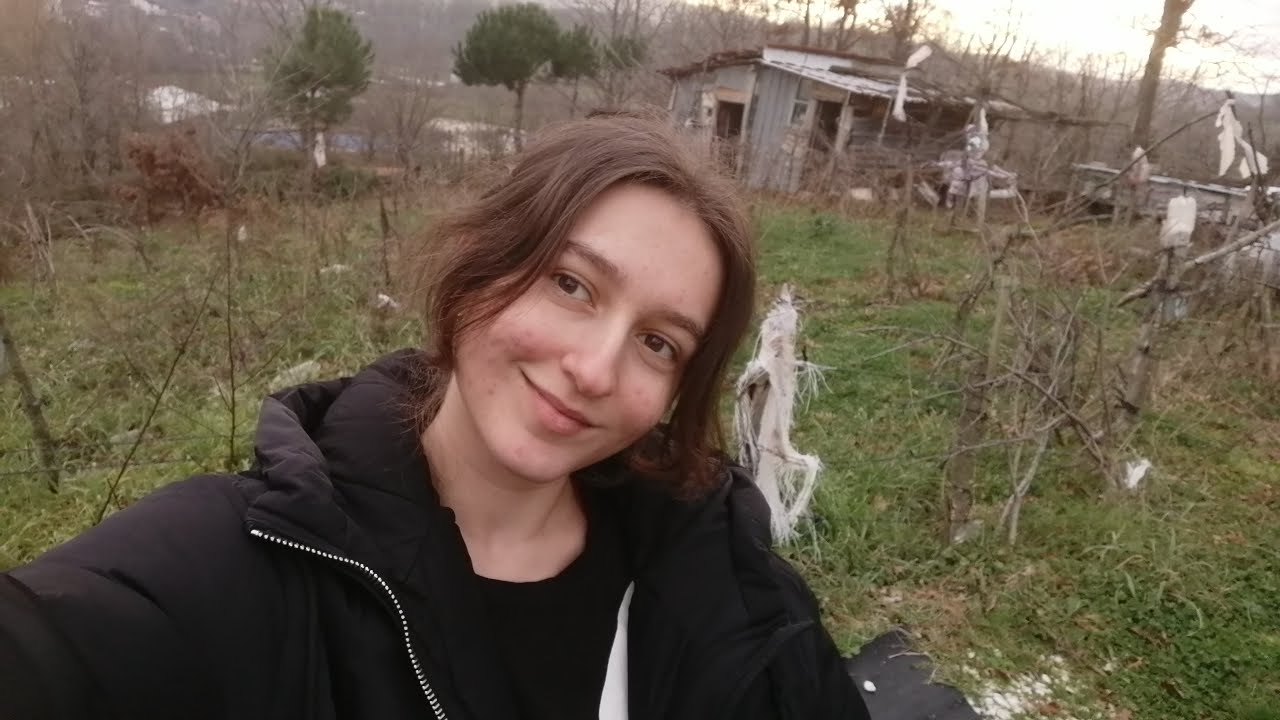

In [ ]:
import cv2
import numpy as np
from collections import deque
from google.colab.patches import cv2_imshow


# Nesne merkezini depolayacak veri tipi
buffer_size = 16
pts = deque(maxlen=buffer_size)

# Mavi renk aralığı
blueLower = (84, 98, 0)
blueUpper = (179, 255, 255)

# Fotoğrafı yükle
imgoriginal = cv2.imread("nuray.jpg")

# Blur
blurred = cv2.GaussianBlur(imgoriginal, (11, 11), 0)

# HSV
hsv = cv2.cvtColor(blurred, cv2.COLOR_BGR2HSV)

# Mavi için maske oluştur
mask = cv2.inRange(hsv, blueLower, blueUpper)

# Maskenin etrafındaki gürültüleri sil
mask = cv2.erode(mask, None, iterations=2)
mask = cv2.dilate(mask, None, iterations=2)

# Kontur
contours, _ = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
center = None
if len(contours) > 0:
    # En büyük konturu al
    c = max(contours, key=cv2.contourArea)

    # Dikdörtgene çevir
    rect = cv2.minAreaRect(c)
    ((x, y), (width, height), rotation) = rect
    s = "x:{}, y:{}, width:{}, height:{}, rotation:{}".format(np.round(x), np.round(y),
                                                              np.round(width), np.round(height),
                                                              np.round(rotation))
    print(s)

    # Kutucuk
    box = cv2.boxPoints(rect)
    box = np.int64(box)

    # Moment
    M = cv2.moments(c)
    if M["m00"] != 0:
        center = (int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"]))

    # Konturu çizdirme
    cv2.drawContours(imgoriginal, [box], 0, (0, 255, 255), 2)

    # Merkeze bir tane nokta çizelim
    if center is not None:
        cv2.circle(imgoriginal, center, 5, (255, 0, 255), -1)

    # Bilgileri ekrana yazdır
    cv2.putText(imgoriginal, s, (50, 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 0, 0), 2)

pts.appendleft(center)
for i in range(1, len(pts)):
    if pts[i - 1] is None or pts[i] is None:
        continue
    cv2.line(imgoriginal, pts[i - 1], pts[i], (0, 255, 0), 3)

# Sonucu göster
cv2_imshow( imgoriginal)
cv2.waitKey(0)
cv2.destroyAllWindows()


(2448, 3264)
(1223, 1069)
(1226, 2196)


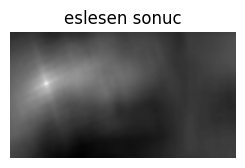

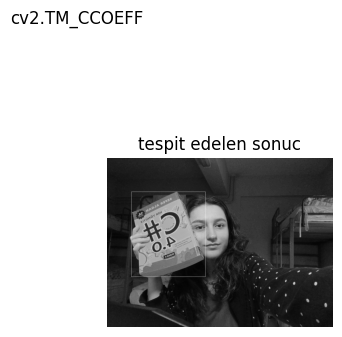

(1226, 2196)


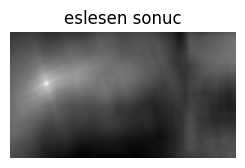

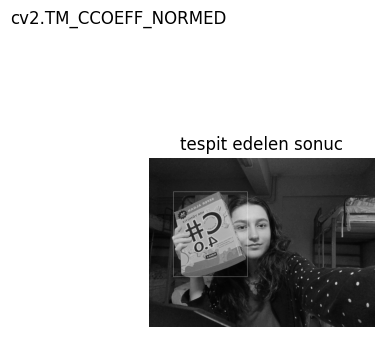

(1226, 2196)


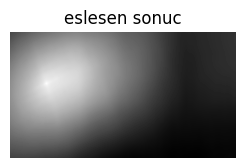

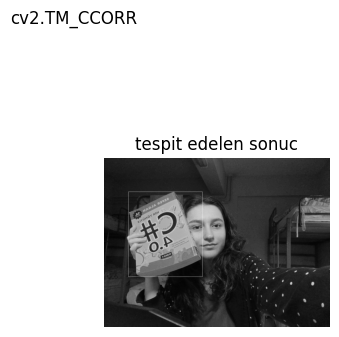

(1226, 2196)


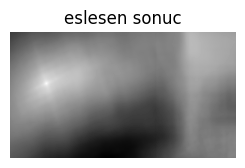

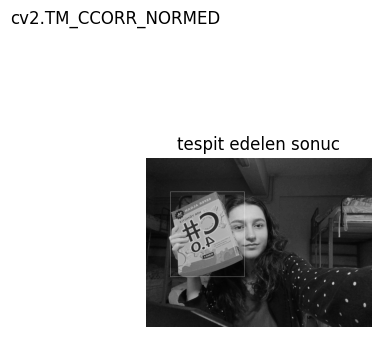

(1226, 2196)


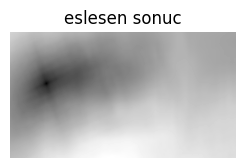

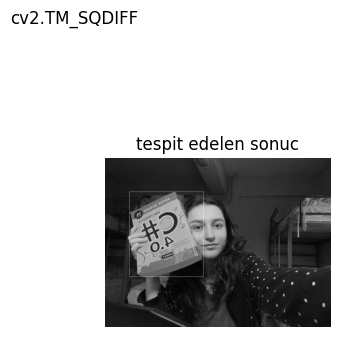

(1226, 2196)


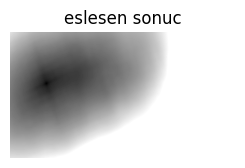

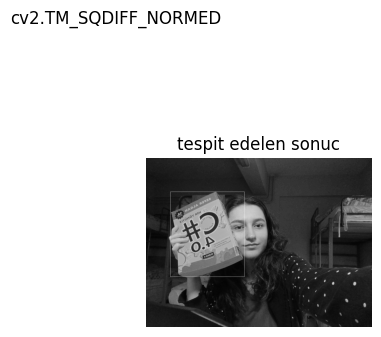

In [ ]:
#şablon eşleşme
import cv2
import numpy as np
from collections import deque
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt




img=cv2.imread("nunu.jpg",0)
print(img.shape)
template=cv2.imread("nunu1.jpg",0)
print(template.shape)
h,w=template.shape

methods=['cv2.TM_CCOEFF','cv2.TM_CCOEFF_NORMED','cv2.TM_CCORR','cv2.TM_CCORR_NORMED','cv2.TM_SQDIFF','cv2.TM_SQDIFF_NORMED']
for meth in methods:
  method=eval(meth)
  res=cv2.matchTemplate(img,template,method)
  print(res.shape)
  min_val,max_val,min_loc,max_loc=cv2.minMaxLoc(res)

  if method in[cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
    top_left=min_loc
  else:
    top_left=max_loc
  bottom_right=(top_left[0]+w,top_left[1]+h)
  cv2.rectangle(img,top_left,bottom_right,255,2)
  plt.figure()
  plt.subplot(121)
  plt.imshow(res,cmap="gray")
  plt.title("eslesen sonuc")
  plt.axis("off")

  plt.figure()
  plt.subplot(122)
  plt.imshow(img,cmap="gray")
  plt.title("tespit edelen sonuc")
  plt.axis("off")

  plt.suptitle(meth)
  plt.show()









(<matplotlib.image.AxesImage at 0x7c6566a95fc0>, (-0.5, 4332.5, 2447.5, -0.5))

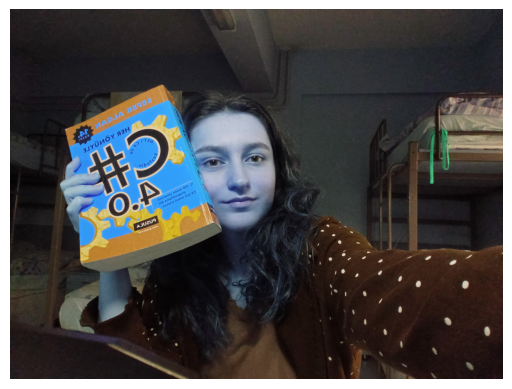

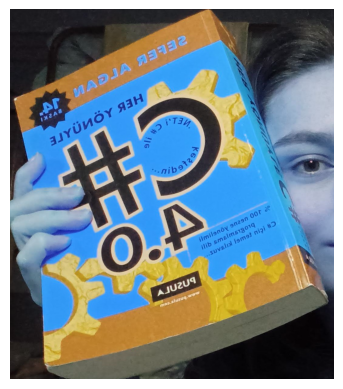

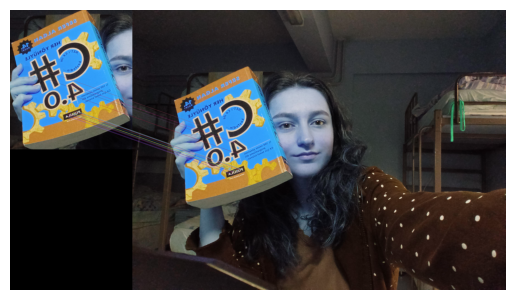

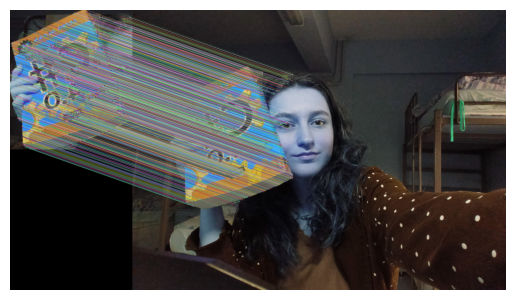

In [ ]:
import cv2
import numpy as np
from collections import deque
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt


chos=cv2.imread("nunu.jpg")
plt.figure()
plt.imshow(chos,cmap="gray")
plt.axis("off")
cho=cv2.imread("nunu1.jpg")
plt.figure()
plt.imshow(cho,cmap="gray")
plt.axis("off")

#orb tanılayıcısı
#koşe kenar gibi nesneye ait özellikler
orb=cv2.ORB_create()

#anahtar nokta teespiti
kp1,des1=orb.detectAndCompute(cho,None)
kp2,des2=orb.detectAndCompute(chos,None)

#brute fore matcher
bf=cv2.BFMatcher(cv2.NORM_HAMMING)

#noktaları eşleştır
matches=bf.match(des1,des2)

#mesafeye göre sırala
matches=sorted(matches,key=lambda x:x.distance)

#eslese n resimleri görselleştir
plt.figure()
img_match=cv2.drawMatches(cho,kp1,chos,kp2,matches[:20],None,flags=2)


# SIFT(daha iyi)
sift = cv2.xfeatures2d.SIFT_create()

# Brute force matcher
bf = cv2.BFMatcher()


#anahtar nokta tespiti sift ile
plt.imshow(img_match),plt.axis("off")
kp1,des1=sift.detectAndCompute(cho,None)
kp2,des2=sift.detectAndCompute(chos,None)

matches=bf.knnMatch(des1,des2,k=2)
guzeleslesme=[]

for match1,match2 in matches:
  if match1.distance<0.75*match2.distance:
    guzeleslesme.append([match1])

plt.figure()
sift_matches=cv2.drawMatchesKnn(cho,kp1,chos,kp2,guzeleslesme,None,flags=2)
plt.imshow(sift_matches),plt.axis("off")







(<Figure size 640x480 with 1 Axes>,
 (-0.5, 3263.5, 2447.5, -0.5))

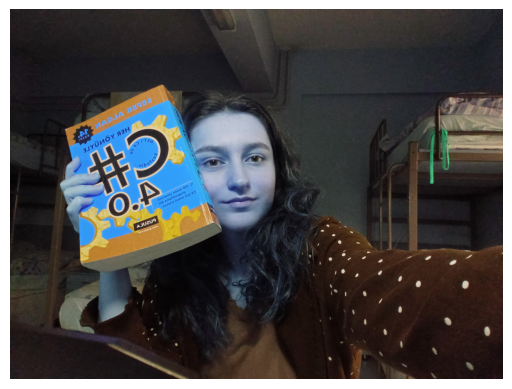

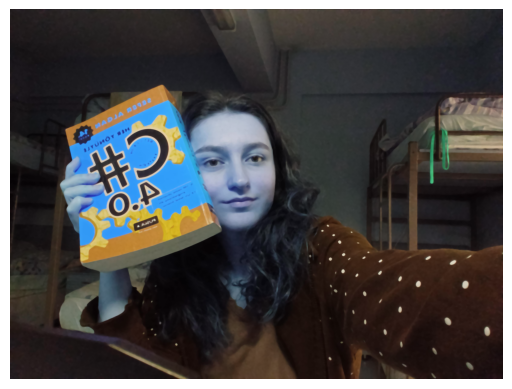

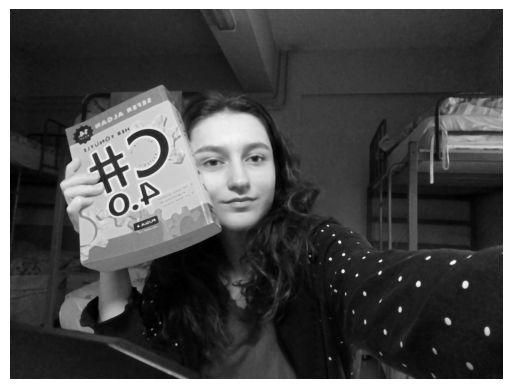

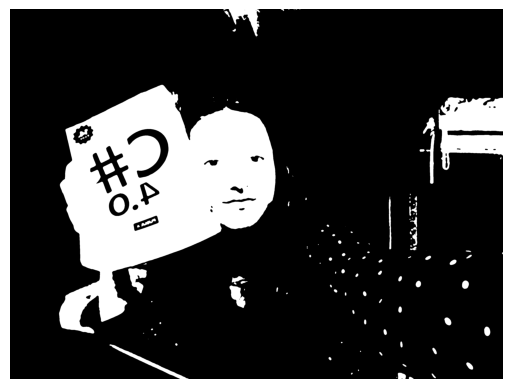

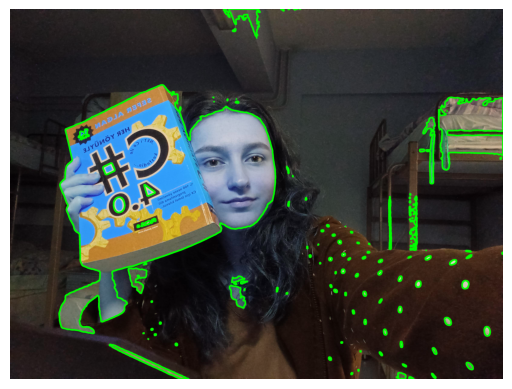

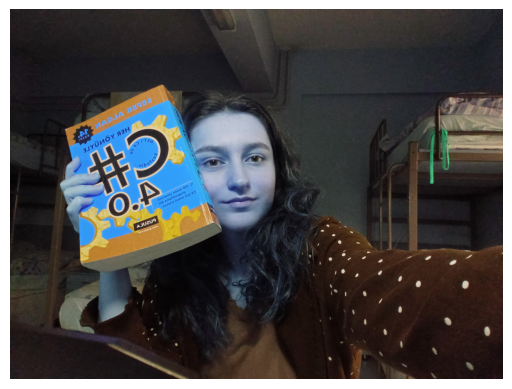

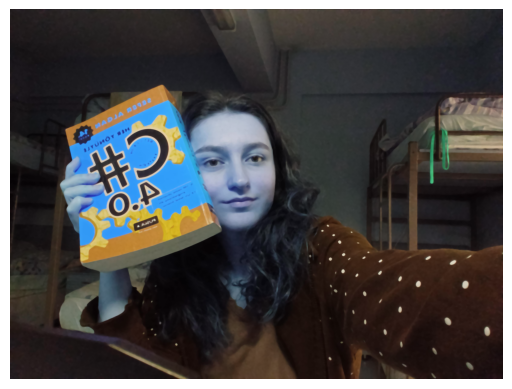

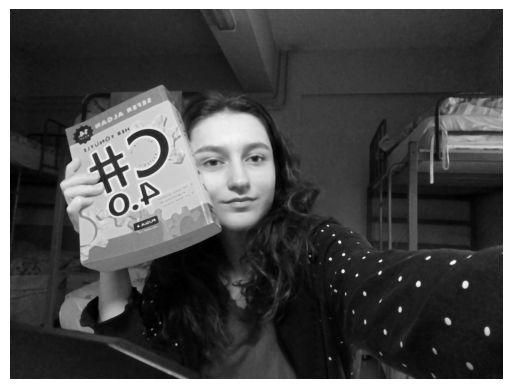

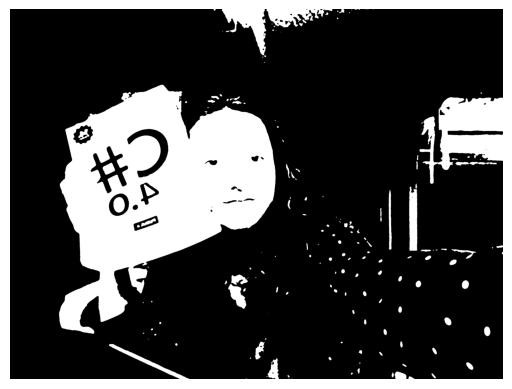

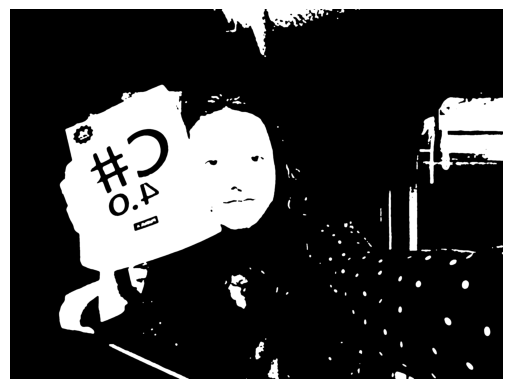

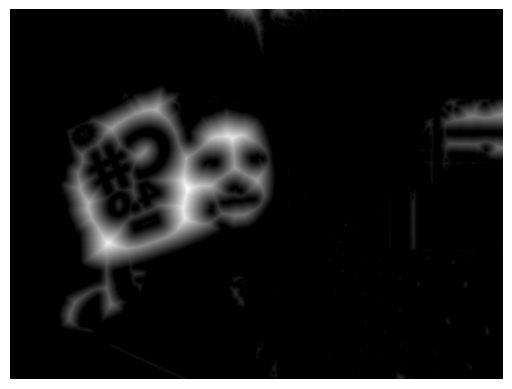

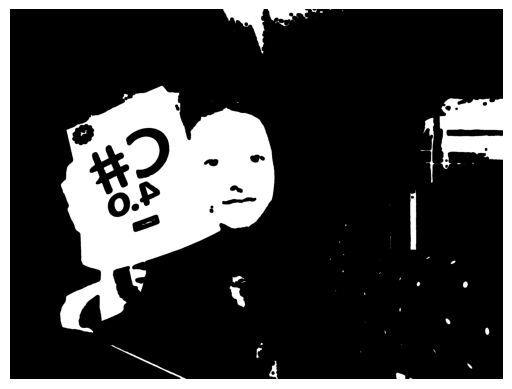

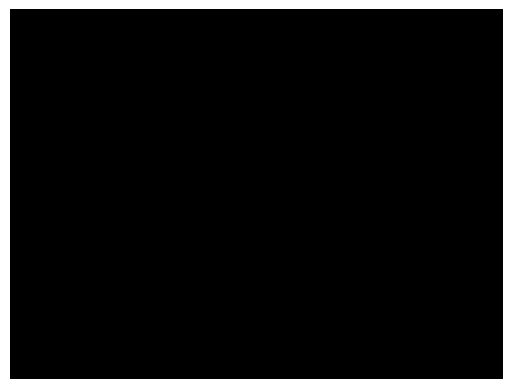

In [ ]:
#havza algoritması nesne tespiti
import cv2
import numpy as np
from collections import deque
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

coin=cv2.imread("nunu.jpg")
plt.figure(),plt.imshow(coin),plt.axis("off")

coinblur=cv2.medianBlur(coin,13)
plt.figure(),plt.imshow(coinblur),plt.axis("off")

coingray=cv2.cvtColor(coinblur,cv2.COLOR_BGR2GRAY)
plt.figure(),plt.imshow(coingray,cmap="gray"),plt.axis("off")

#binary threshold
ret,cointhresh=cv2.threshold(coingray,75,255,cv2.THRESH_BINARY)
plt.figure(),plt.imshow(cointhresh,cmap="gray"),plt.axis("off")

#kontur
contours,hierarchy=cv2.findContours(cointhresh.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
  if hierarchy[0][i][3]==-1:
    cv2.drawContours(coin,contours,i,(0,255,0),10)
plt.figure(),plt.imshow(coin),plt.axis("off")




coin=cv2.imread("nunu.jpg")
plt.figure(),plt.imshow(coin),plt.axis("off")

coinblur=cv2.medianBlur(coin,13)
plt.figure(),plt.imshow(coinblur),plt.axis("off")

coingray=cv2.cvtColor(coinblur,cv2.COLOR_BGR2GRAY)
plt.figure(),plt.imshow(coingray,cmap="gray"),plt.axis("off")

#binary threshold
ret,cointhresh=cv2.threshold(coingray,65,255,cv2.THRESH_BINARY)
plt.figure(),plt.imshow(cointhresh,cmap="gray"),plt.axis("off")

#açılma
kernel=np.ones((3,3),np.uint8)
opening=cv2.morphologyEx(cointhresh,cv2.MORPH_OPEN,kernel,iterations=2)
plt.figure(),plt.imshow(opening,cmap="gray"),plt.axis("off")

#nesneler arası distance
dist_transfor=cv2.distanceTransform(opening,cv2.DIST_L2,5)
plt.figure(),plt.imshow(dist_transfor,cmap="gray"),plt.axis("off")

#resmi küçült
ret,sureforeground=cv2.threshold(dist_transfor,0.4*np.max(dist_transfor),255,0)
plt.figure(),plt.imshow(sureforeground,cmap="gray"),plt.axis("off")


#arkapplan için resmi büyüt
surebackground=cv2.dilate(opening,kernel,iterations=1)
sureforeground=np.uint8(surebackground)
unknown=cv2.subtract(surebackground,sureforeground)
plt.figure(),plt.imshow(unknown,cmap="gray"),plt.axis("off")









